OBJETIVO: Predecir un posible fallo en el corazón de un paciente a partir de síntomas y demás datos relevantes como la edad.

In [2]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [11]:
# Levanto el dataset
url = 'heartfailure-dataset.csv'
df = pd.read_csv(url, sep=',')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Estadisticas de colesterol
variableTarget = df['Cholesterol']
variableTarget.describe().round(0)

count    918.0
mean     199.0
std      109.0
min        0.0
25%      173.0
50%      223.0
75%      267.0
max      603.0
Name: Cholesterol, dtype: float64

In [5]:
# Calculo medidas basicas
media = variableTarget.mean()
mediana = variableTarget.median()
primerCuartil = variableTarget.quantile(0.25)
tercerCuartil = variableTarget.quantile(0.75)

Text(0.5, 1.0, 'Distribución de SalePrice')

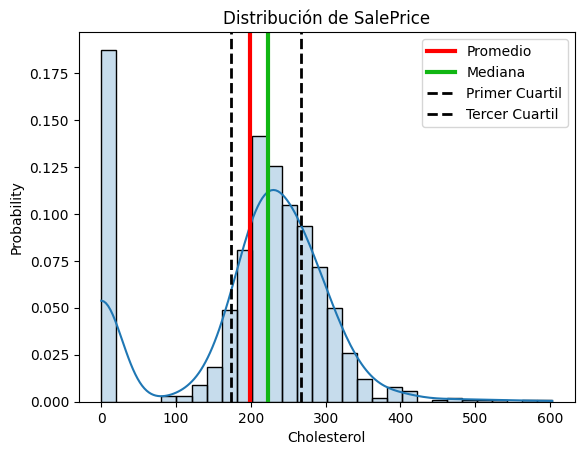

In [6]:
# Grafico e histograma
plt.Figure()
sns.histplot(data = df,
             x = 'Cholesterol',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat = 'probability')
# Linea promedio
plt.axvline(x = media,
            color = 'red',
            linestyle = '-',
            label = 'Promedio',
            linewidth = 3)
# Linea mediana
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primerCuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercerCuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()
plt.title('Distribución de SalePrice')

c:\Users\valen\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribución del valor de colesterol de pacientes en Logaritmo')

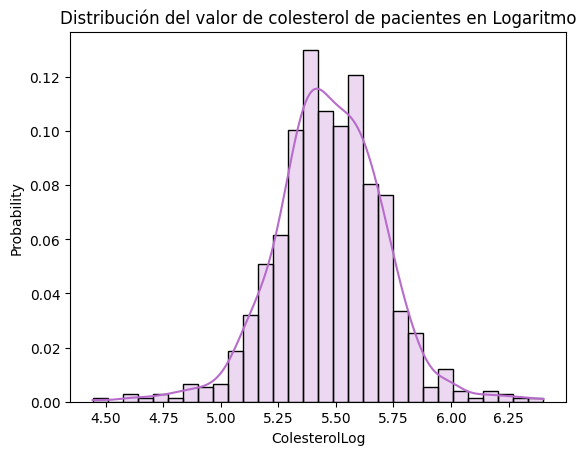

In [7]:
df['ColesterolLog'] = np.log(df['Cholesterol'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'ColesterolLog',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución del valor de colesterol de pacientes en Logaritmo')

CONCLUSION:
Podemos observar un patron similar a una campana de Gauss bastante marcada, donde la gran mayoria de valores se encuentran entre el segundo y tercer cuartil del indice 5.

In [8]:
# Calculo y muestro variables con vacíos 
valoresNulos  = df.isnull().sum()
columnasNulos = valoresNulos[valoresNulos > 0]
print('Cantidad de columnas con valores vacíos:')
print(columnasNulos.shape)
print('')
print('Variables con valores vacíos: ')
print(columnasNulos.sort_values(ascending=False))

Cantidad de columnas con valores vacíos:
(0,)

Variables con valores vacíos: 
Series([], dtype: int64)


Vemos que no se encuentran valores vacios en el dataframe

GRAFICO: Edad de las personas que han sufrido problemas en el corazon usando Pyplot y Seaborn

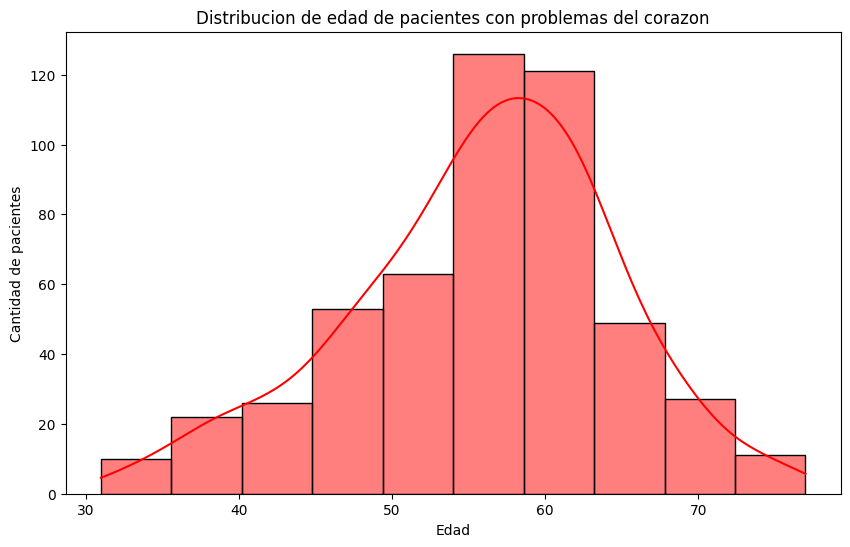

In [9]:
# Filtramos por los pacientes que presentaron problemas en el corazon
pacientesProblemaCorazon = df[df['HeartDisease'] == 1]

# Tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear distribucion de edad con Seaborn
sns.histplot(pacientesProblemaCorazon['Age'], bins=10, kde=True, color='red')

# Detalles del grafico
plt.title('Distribucion de edad de pacientes con problemas del corazon')
plt.xlabel('Edad')
plt.ylabel('Cantidad de pacientes')

plt.show()

CONCLUSION: Vemos que La gran mayoria de los pacientes que sufrieron problemas del corazon, se encuentran entre los 55 y 65 años de edad.